## Customer Segmentation with RFM Analysis

RFM (recency, frequency and monetary) is a method used for analyzing customer value. Using a dataset (https://raw.githubusercontent.com/daniel-isidro/customer_segmentation/main/data/sales_asia.csv) that contains sales orders in a period of time, we will use Python to obtain the frequency, recency and monetary and calculating RFM_Score for each customer. Based on RFM_Score, we will group the customers into different segments, which are 

1. Top Customers
2. High value Customer
3. Medium Value Customer
4. Low Value Customers
5. Lost Customers

We have performed the following operations on the data-

1. Data Acquisition
2. Data Preparation
3. Data Exploration with visualization
4. Modeling
5. Customer segment visualization


In [296]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/daniel-isidro/customer_segmentation/main/data/sales_asia.csv", delimiter=";")

In [297]:
df.head(10)

,country,id,week.year,revenue,units
0,KR,702234,3.2019,"808,08",1
1,KR,702234,6.2019,"1606,80",2
2,KR,3618438,8.2019,"803,40",1
3,KR,3618438,9.2019,"803,40",1
4,KR,3618438,9.2019,"803,40",1
5,KR,3618438,13.2019,"2376,42",3
6,KR,3618438,12.2019,"1198,74",1
7,KR,702234,16.2019,"797,82",1
8,KR,3618438,18.2019,"399,54",1
9,KR,3618438,16.2019,"1596,00",2


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235574 entries, 0 to 235573
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    235574 non-null  object 
 1   id         235574 non-null  int64  
 2   week.year  235574 non-null  float64
 3   revenue    235574 non-null  object 
 4   units      235574 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ MB


In [299]:
# date is in week.year format, to convert it into standard format we are using the follwing function
from datetime import date, timedelta

def monday_of_calenderweek(year, week):
    first = date(year, 1, 1)
    base = 1 if first.isocalendar()[1] == 1 else 8
    return first + timedelta(days=base - first.isocalendar()[2] + 7 * (week - 1))

In [300]:
# make string version of original column, call it 'col'
xx = [cc.split(".") for cc in (df['week.year']).astype(str).tolist()]

# year 2020 was 202 in date column, we are converting it to 2020
for x in xx:
    if x[1]=='202':
        
        x[1]=2020

xx1 = [monday_of_calenderweek(int(xxx[1]),int(xxx[0])) for xxx in xx]

In [301]:
xx1 = [monday_of_calenderweek(int(xxx[1]),int(xxx[0])) for xxx in xx]
df['date']=pd.DataFrame(xx1)
df['date']

0         2019-01-14
1         2019-02-04
2         2019-02-18
3         2019-02-25
4         2019-02-25
             ...    
235569    2020-06-29
235570    2020-06-29
235571    2020-06-29
235572    2020-06-29
235573    2020-06-29
Name: date, Length: 235574, dtype: object

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235574 entries, 0 to 235573
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    235574 non-null  object 
 1   id         235574 non-null  int64  
 2   week.year  235574 non-null  float64
 3   revenue    235574 non-null  object 
 4   units      235574 non-null  int64  
 5   date       235574 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 10.8+ MB


In [303]:
df['date'].min()

datetime.date(2018, 12, 31)

In [304]:
df['date'].max()

datetime.date(2020, 11, 23)

In [305]:
# Let’s explore in how many different countries we have sales in that period:
df.country.unique()

array(['KR', 'PK', 'MM', 'VN', 'IN', 'SA', 'PH', 'AF', 'CN', 'BD', 'ID',
       'TH', 'IQ', 'MY', 'JP', 'IR', 'TR', 'UZ'], dtype=object)

In [ ]:
# For greater visibility in the plots we convert the dates to monthly periods:

In [306]:
#Total number of customers in all countries:
df['id'].nunique()

21837

In [308]:
df1=df.drop(['week.year'], axis=1)

In [309]:
df1

,country,id,revenue,units,date
0,KR,702234,"808,08",1,2019-01-14
1,KR,702234,"1606,80",2,2019-02-04
2,KR,3618438,"803,40",1,2019-02-18
3,KR,3618438,"803,40",1,2019-02-25
4,KR,3618438,"803,40",1,2019-02-25
...,...,...,...,...,...
235569,CN,2452476,"41160,00",200,2020-06-29
235570,CN,2452476,"50856,00",400,2020-06-29
235571,CN,2452476,"79920,00",1200,2020-06-29
235572,CN,4553904,"4788,00",100,2020-06-29


In [310]:
df.reset_index(inplace=True)

In [311]:
# making date as index based on months by droping the day

df.index = pd.to_datetime(df.date)
dff = df.to_period('M')

In [312]:
dff.drop('index', axis=1, inplace=True)
dff.drop('week.year', axis=1, inplace=True)
dff.drop('date', axis=1, inplace=True)

In [313]:
dff

,country,id,revenue,units
date,,,,
2019-01,KR,702234,"808,08",1
2019-02,KR,702234,"1606,80",2
2019-02,KR,3618438,"803,40",1
2019-02,KR,3618438,"803,40",1
2019-02,KR,3618438,"803,40",1
...,...,...,...,...
2020-06,CN,2452476,"41160,00",200
2020-06,CN,2452476,"50856,00",400
2020-06,CN,2452476,"79920,00",1200


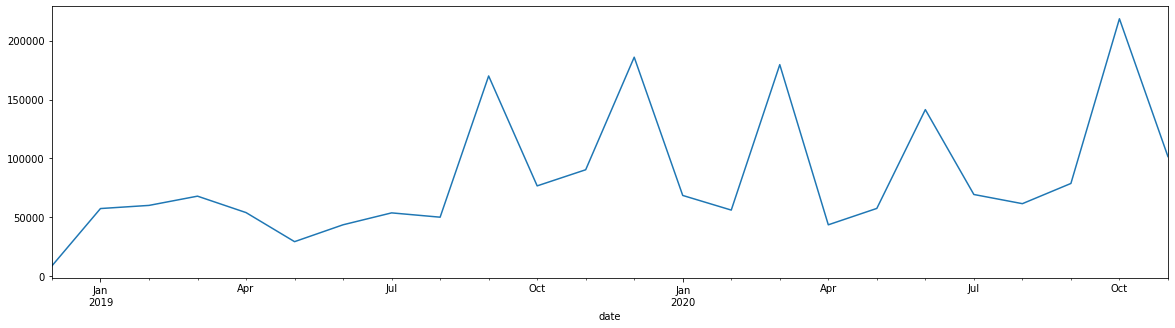

In [314]:
# plot to show number of units sold in each month
import matplotlib.pyplot as plt

dff['units'].groupby('date').agg(sum).plot(figsize=(20,5));

In [315]:
#removing comma "," from the revenue numbers ex-> 8198,67=>819867

p = [x.replace(",", "") for x in dff['revenue']]


In [318]:
dff['revenue0']=p

In [320]:
dff#.astype(int) # this did not work, hence next line

,country,id,revenue,units,revenue1,revenue0
date,,,,,,
2019-01,KR,702234,"808,08",1,NaN,80808
2019-02,KR,702234,"1606,80",2,NaN,160680
2019-02,KR,3618438,"803,40",1,NaN,80340
2019-02,KR,3618438,"803,40",1,NaN,80340
2019-02,KR,3618438,"803,40",1,NaN,80340
...,...,...,...,...,...,...
2020-06,CN,2452476,"41160,00",200,NaN,4116000
2020-06,CN,2452476,"50856,00",400,NaN,5085600
2020-06,CN,2452476,"79920,00",1200,NaN,7992000


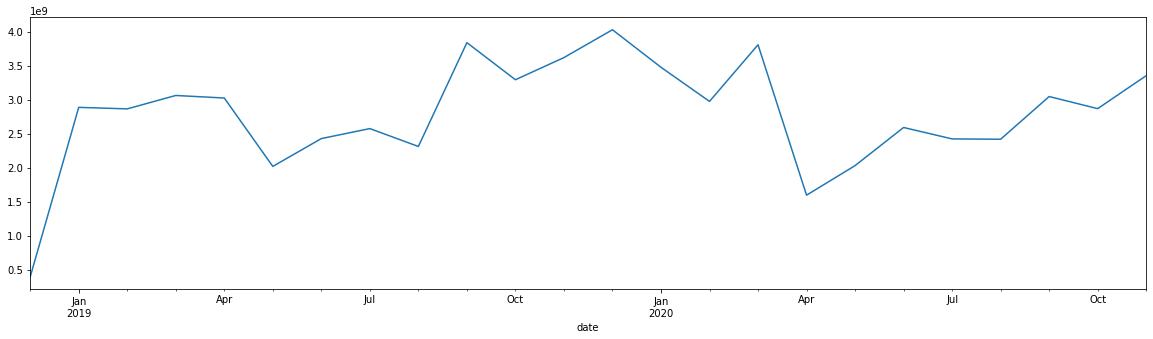

In [321]:
# plot to show revenue in each month

dff.revenue0=pd.to_numeric(dff.revenue0) # converting object type revenue to numeric for calculation
dff['revenue0'].groupby('date').agg(sum).plot(figsize=(20,5));

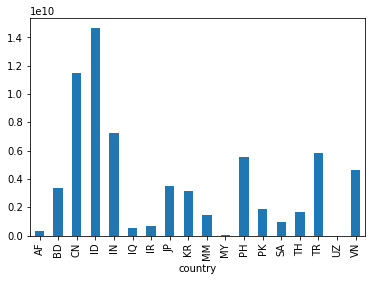

In [446]:
# plot to show revenue of each country

dff.revenue0=pd.to_numeric(dff.revenue0) # converting object type revenue to numeric for calculation
dff.groupby(['country']).revenue0.sum().plot.bar();

In [323]:
# Some of the id might be similar in different countries. To make all the id's unique we are adding country name before id's

dff['id+'] = dff['country'].map(str) + dff['id'].map(str)

In [326]:
dff.drop('revenue', axis=1, inplace=True)

In [327]:
dff

,country,id,units,revenue0,id+
date,,,,,
2019-01,KR,702234,1,80808,KR702234
2019-02,KR,702234,2,160680,KR702234
2019-02,KR,3618438,1,80340,KR3618438
2019-02,KR,3618438,1,80340,KR3618438
2019-02,KR,3618438,1,80340,KR3618438
...,...,...,...,...,...
2020-06,CN,2452476,200,4116000,CN2452476
2020-06,CN,2452476,400,5085600,CN2452476
2020-06,CN,2452476,1200,7992000,CN2452476


In [333]:
dff1=dff

In [350]:
dff1 = dff1.reset_index(drop=True)

In [361]:
dff1['date']=df1.date

In [363]:
dff1.groupby(['id+']).date.max()

id+
AF186035892    2020-04-06
AF186035934    2019-05-13
AF1915092      2020-11-23
AF1915452      2019-07-08
AF1915920      2020-01-06
                  ...    
VN993528       2020-11-23
VN993996       2020-07-20
VN995010       2020-05-11
VN998088       2019-05-06
VN998130       2020-04-20
Name: date, Length: 21849, dtype: object

In [392]:
# Aggregate at customer level using pivot table

customer_data = pd.DataFrame(dff1.pivot_table(index="id+", 
                                              values=["date", "units", "revenue0"], 
                                              aggfunc={"date": [min, max, 'count'], "units": sum, "revenue0":[min, max,sum]}))
customer_data.head()

date                         revenue0                   units
            count         max         min      max     min       sum   sum
id+                                                                       
AF186035892     1  2020-04-06  2020-04-06    27786   27786     27786     1
AF186035934     1  2019-05-13  2019-05-13    18462   18462     18462     1
AF1915092     342  2020-11-23  2019-01-07  2634372 -120948  55409730   768
AF1915452       6  2019-07-08  2019-01-07   120186   18120    231492     7
AF1915920       1  2020-01-06  2020-01-06   223860  223860    223860     1

In [393]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21849 entries, AF186035892 to VN998130
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   (date, count)    21849 non-null  int64 
 1   (date, max)      21849 non-null  object
 2   (date, min)      21849 non-null  object
 3   (revenue0, max)  21849 non-null  int64 
 4   (revenue0, min)  21849 non-null  int64 
 5   (revenue0, sum)  21849 non-null  int64 
 6   (units, sum)     21849 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.3+ MB


In [394]:
# Rename columns
customer_data.columns = ["frequency","lastdate", "firstdate", "revmax", "revmin", "monetary","totalunits"]
customer_data.head()

,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits
id+,,,,,,,
AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1
AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1
AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768
AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7
AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1


In [395]:
import datetime 

today = datetime.date.today()

In [396]:
customer_data['Recency'] = customer_data['lastdate'].apply(
    lambda x: (today-x).days)

In [397]:
customer_data.head()

,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits,Recency
id+,,,,,,,,
AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1,947
AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1,1276
AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768,716
AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7,1220
AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1,1038


In [399]:
# upload
# plot conty wise revenue and sales
customer_data['R_rank'] = customer_data['Recency'].rank(ascending=False)
customer_data['F_rank'] = customer_data['frequency'].rank(ascending=True)
customer_data['M_rank'] = customer_data['monetary'].rank(ascending=True)
 



In [400]:
# normalizing the rank of the customers
customer_data['R_rank_norm'] = (customer_data['R_rank']/customer_data['R_rank'].max())*100
customer_data['F_rank_norm'] = (customer_data['F_rank']/customer_data['F_rank'].max())*100
customer_data['M_rank_norm'] = (customer_data['F_rank']/customer_data['M_rank'].max())*100
 
#rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
customer_data.head()

,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
id+,,,,,,,,,,,,,,
AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1,947,8749.0,3368.5,996.5,41.171765,15.417182,15.417182
AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1,1276,2134.5,3368.5,461.0,10.044706,15.417182,15.417182
AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768,716,21250.0,21819.0,21752.0,100.000000,99.862694,99.862694
AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7,1220,2927.5,14641.0,8295.0,13.776471,67.009932,67.009932
AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1,1038,6245.0,3368.5,8092.0,29.388235,15.417182,15.417182


In [403]:
#formula for calculating rfm scores

customer_data['RFM_Score'] = 0.15*customer_data['R_rank_norm']+0.28 * \
                            customer_data['F_rank_norm']+0.57*customer_data['M_rank_norm']
customer_data['RFM_Score'] *= 0.05
customer_data = customer_data.round(2)
customer_data[ 'RFM_Score'].head(7)

id+
AF186035892    0.96
AF186035934    0.73
AF1915092      4.99
AF1915452      2.95
AF1915920      0.88
AF1915944      2.58
AF1915962      0.78
Name: RFM_Score, dtype: float64

In [408]:
import numpy as np

#classifying customers into five segments based on RFM_Scores 

customer_data["Customer_segment"] = np.where(customer_data['RFM_Score'] > 4.5, "Top Customers",
                                      (np.where(customer_data['RFM_Score'] > 4, "High value Customer",
                                        (np.where(customer_data['RFM_Score'] > 3,"Medium Value Customer",
                                           np.where(customer_data['RFM_Score'] > 1.6, 'Low Value Customers',
                                                     'Lost Customers'))))))
customer_data[[ 'RFM_Score', 'Customer_segment']].head(500)

,RFM_Score,Customer_segment
id+,,
AF186035892,0.96,Lost Customers
AF186035934,0.73,Lost Customers
AF1915092,4.99,Top Customers
AF1915452,2.95,Low Value Customers
AF1915920,0.88,Lost Customers
...,...,...
BD2549724,3.51,Medium Value Customer
BD2549754,3.47,Medium Value Customer
BD2549832,3.51,Medium Value Customer


<AxesSubplot:xlabel='Customer_segment'>

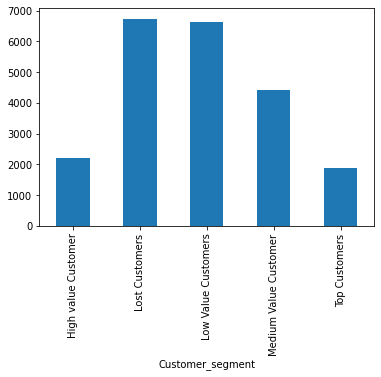

In [419]:
#plot to visualize number of customers in each segment

customer_data.groupby('Customer_segment').Customer_segment.count().plot.bar()

In [423]:
analysis=customer_data.reset_index()

In [424]:
analysis.head()

,id+,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1,947,8749.0,3368.5,996.5,41.17,15.42,15.42,0.96,Lost Customers
1,AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1,1276,2134.5,3368.5,461.0,10.04,15.42,15.42,0.73,Lost Customers
2,AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768,716,21250.0,21819.0,21752.0,100.00,99.86,99.86,4.99,Top Customers
3,AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7,1220,2927.5,14641.0,8295.0,13.78,67.01,67.01,2.95,Low Value Customers
4,AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1,1038,6245.0,3368.5,8092.0,29.39,15.42,15.42,0.88,Lost Customers


In [425]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21849 entries, 0 to 21848
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id+               21849 non-null  object 
 1   frequency         21849 non-null  int64  
 2   lastdate          21849 non-null  object 
 3   firstdate         21849 non-null  object 
 4   revmax            21849 non-null  int64  
 5   revmin            21849 non-null  int64  
 6   monetary          21849 non-null  int64  
 7   totalunits        21849 non-null  int64  
 8   Recency           21849 non-null  int64  
 9   R_rank            21849 non-null  float64
 10  F_rank            21849 non-null  float64
 11  M_rank            21849 non-null  float64
 12  R_rank_norm       21849 non-null  float64
 13  F_rank_norm       21849 non-null  float64
 14  M_rank_norm       21849 non-null  float64
 15  RFM_Score         21849 non-null  float64
 16  Customer_segment  21849 non-null  object

In [426]:
analysis['Section_Number'] = analysis['id+'].str.replace('([A-Z]+)', '')
analysis['Section_Letter'] = analysis['id+'].str.extract('([A-Z]+)')

In [427]:
analysis.head()

,id+,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,Section_Number,Section_Letter
0,AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1,947,8749.0,3368.5,996.5,41.17,15.42,15.42,0.96,Lost Customers,186035892,AF
1,AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1,1276,2134.5,3368.5,461.0,10.04,15.42,15.42,0.73,Lost Customers,186035934,AF
2,AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768,716,21250.0,21819.0,21752.0,100.00,99.86,99.86,4.99,Top Customers,1915092,AF
3,AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7,1220,2927.5,14641.0,8295.0,13.78,67.01,67.01,2.95,Low Value Customers,1915452,AF
4,AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1,1038,6245.0,3368.5,8092.0,29.39,15.42,15.42,0.88,Lost Customers,1915920,AF


In [428]:
analysis.rename(columns={'Section_Number':'id', 'Section_Letter':'country'}, inplace=True)

<AxesSubplot:xlabel='country'>

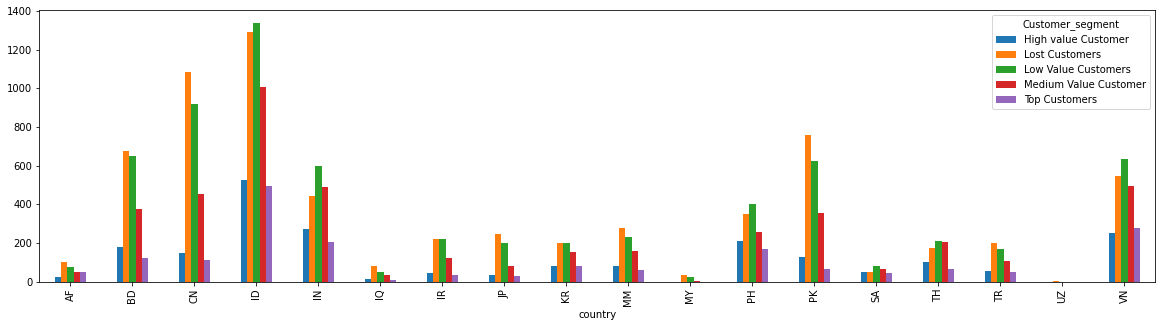

In [433]:
analysis.groupby(['country']).Customer_segment.value_counts().unstack().plot.bar(figsize=(20,5))

In [447]:
def truncate(x): return math.trunc(x)

analysis['fm'] = ((analysis['f'] + analysis['m'])/2).apply(lambda x: truncate(x))

,id+,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,id,country
0,AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1,947,8749.0,3368.5,996.5,41.17,15.42,15.42,0.96,Lost Customers,186035892,AF
1,AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1,1276,2134.5,3368.5,461.0,10.04,15.42,15.42,0.73,Lost Customers,186035934,AF
2,AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768,716,21250.0,21819.0,21752.0,100.00,99.86,99.86,4.99,Top Customers,1915092,AF
3,AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7,1220,2927.5,14641.0,8295.0,13.78,67.01,67.01,2.95,Low Value Customers,1915452,AF
4,AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1,1038,6245.0,3368.5,8092.0,29.39,15.42,15.42,0.88,Lost Customers,1915920,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21844,VN993528,5,2020-11-23,2019-01-07,296370,20148,398256,5,716,21250.0,13758.0,11192.0,100.00,62.97,62.97,3.43,Medium Value Customer,993528,VN
21845,VN993996,2,2020-07-20,2020-02-17,296370,107358,403728,2,842,11761.0,8368.0,11244.0,55.35,38.30,38.30,2.04,Low Value Customers,993996,VN
21846,VN995010,1,2020-05-11,2020-05-11,54432,54432,54432,1,912,9560.0,3368.5,2106.0,44.99,15.42,15.42,0.99,Lost Customers,995010,VN
21847,VN998088,2,2019-05-06,2019-03-18,61746,38484,100230,2,1283,2034.0,8368.0,3979.0,9.57,38.30,38.30,1.70,Low Value Customers,998088,VN


In [448]:
# We export the dataframe to a CSV file for later processing it in Power BI
# (We added the parameter float_format='%.2f' for setting numbers to two decimals)

analysis.to_csv('rfm_asia.csv', encoding='utf-8', index=False, float_format='%.2f')